# 02주차 - 단순선형실습

- 패스트캠퍼스 2주차 실습


In [6]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm 

In [8]:
# 현재 경로 확인 
os.getcwd()

'/Users/kimjuwon/[KDC]FastCampus_MachineLearning_Python'

In [9]:
# 데이터 불러오기 
boston = pd.read_csv("./data/Boston_house.csv")

In [10]:
# 확인
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [11]:
# target 데이터만 뽑기 
boston_data = boston.drop(['Target'],axis=1)

In [12]:
boston_data.describe()
# 데이터 통계 추출 
# 보스턴 집값 예측 - 실습 

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [13]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

In [18]:
#crim / rm / lstat 세게의 변수로 각각 단순선형 회귀 분석하기 (범죄율, 주택당 방수, 인구중 하위 계층 비율)
target = boston['Target']
crim = boston['CRIM']
rm = boston['RM']
lstat = boston['LSTAT']

target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

## target ~ crime 모델 분석

In [20]:
# crim 변수에 상수항 추가하기 - 항상 상수항 추가해줘야함  
crim1 = sm.add_constant(crim,has_constant="add")
crim1

/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [25]:
# sm.OLS 적합시키기 

model1 = sm.OLS(target, crim1)
fitted_model1 = model1.fit()

In [26]:
# summary함수통해 결과출력
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.17e-19
Time:                        18:42:04   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
## 회귀 계수 출력
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

## y_hat=beta0 + beta1*X 계산해보기

In [32]:
# 회귀계수 * 데이터(x)
np.dot(crim1, fitted_model1.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [33]:
# predict함수를 통해 yhat 구하기 
pred1 = fitted_model1.predict(crim1)

In [34]:
# ## 직접구한 yhat과 predict함수를 통해 구한 yhat차이 
np.dot(crim1, fitted_model1.params) - pred1

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

## 적합시킨 직선 시각화

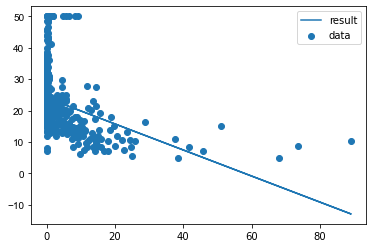

In [35]:
import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #
plt.scatter(crim,target,label="data")
plt.plot(crim,pred1,label="result")
plt.legend()
plt.show()

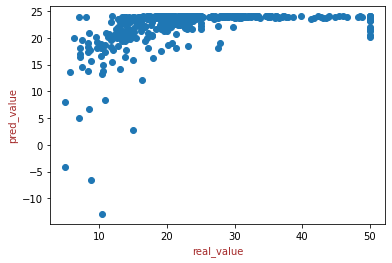

In [38]:
plt.scatter(target,pred1)
plt.xlabel("real_value")# 실측
plt.ylabel("pred_value")# 예측
plt.show()

# 직선이 잘 맞은것 같지는 않다. 

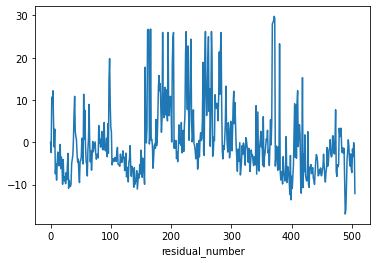

In [39]:
## residual 시각화 
## 범죄율로 예측하는 것은 쉽지 않음 
fitted_model1.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [40]:
# 잔차의 합 계산해보기 
np.sum(fitted_model1.resid)

1.0231815394945443e-12

## 위와 동일하게 rm변수와 lstat 변수로 각각 단순선형회귀분석 적합시켜보기 

In [51]:
# 상수항추가
rm1 = sm.add_constant(rm,has_constant="add")
lstat1 = sm.add_constant(lstat,has_constant="add")

/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
# 회귀모델 적합
model2 = sm.OLS(target, rm1)
fitted_model2 = model2.fit()

model3 = sm.OLS(target, lstat1)
fitted_model3 = model3.fit()

In [53]:
# rm모델 결과 출력 
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.49e-74
Time:                        18:58:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# lstat모델 결과 출력 (r-square 비교)
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           5.08e-88
Time:                        18:58:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
## 각각 yhat_예측하기 
pred2 = fitted_model2.predict(rm1)
pred3 = fitted_model3.predict(lstat1)

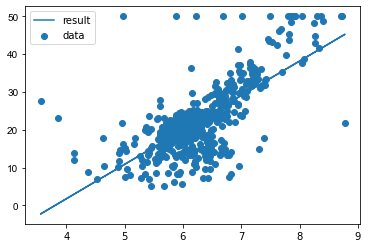

In [56]:
## rm모델 시각화
import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #
plt.scatter(rm,target,label="data")
plt.plot(rm,pred2,label="result")
plt.legend()
plt.show()

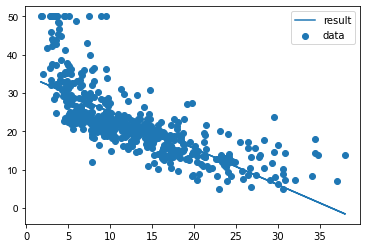

In [57]:
## lstat모델 직선 시각화
import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #
plt.scatter(lstat,target,label="data")
plt.plot(lstat,pred3,label="result")
plt.legend()
plt.show()

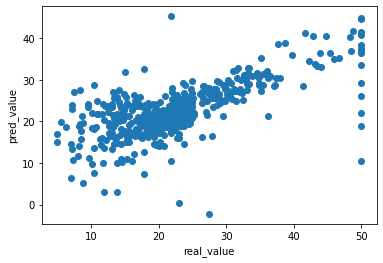

In [58]:
# rm모델 reisidual 시각화 
plt.scatter(target,pred2)
plt.xlabel("real_value")# 실측
plt.ylabel("pred_value")# 예측
plt.show()

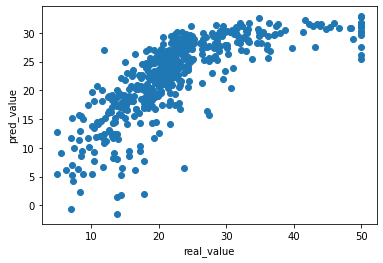

In [59]:
# lstat모델 residual시각화
plt.scatter(target,pred3)
plt.xlabel("real_value")# 실측
plt.ylabel("pred_value")# 예측
plt.show()

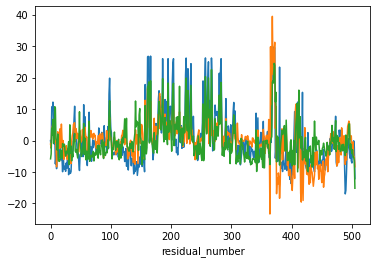

In [60]:
## 세모델의 residual비교 

## residual 시각화 
## 범죄율로 예측하는 것은 쉽지 않음 
fitted_model1.resid.plot()
fitted_model2.resid.plot()
fitted_model3.resid.plot()
plt.xlabel("residual_number")
plt.show()